# STEM for Creatives Week 5  - Images

This week we are going to look at how images are represented on computers, and how we can use some basic techiques to manuipluate them, and start to analyse them. 

### Pixels
|
As we saw with audio, when we break media down on computers, they are just multi-dimensional arrays. Whilst audio is often 1-dimensional (or more for multi-channel audio), images have more components to them. 

Whilst digital audio is made up of **samples**, digital images are made up of **pixels**. When we are dealing with black and white images (often known as **grayscale**), each image is a **2D array**, which each dimension relating to 

- row (height)
- column (width)

Each item in this array represents a pixel and its number tells us where on the scale of black (low) to white (high) it is. We can use different types of numbers to represent ecah pixel but often the scale is 0 - 255.

### PIL (Python Imaging Library)

We use PIL to import and display images, and then turn them into **NumPy** arrays. And we know how to do things with them!

In [1]:
!pip install pillow

You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


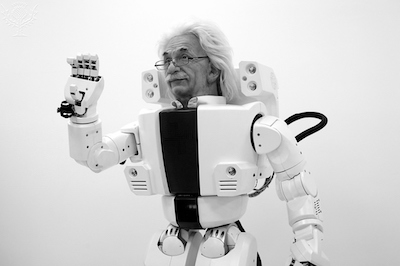

In [56]:
from PIL import Image
import numpy as np

#This is actually a colour image, so we make it grayscale to begin with (convert('L'))
im = np.array(Image.open('../images/robot-enstein.jpg').convert('L'))
Image.fromarray(im)

In [39]:
np.power(2,8)

256

In [40]:
#How big is it?
h = im.shape[0]
w = im.shape[1]
print(w, h)

400 266


In [41]:
#Looking at pixels
#Gives us the grayscale of a particular pixel 
print(im[12,45])
#Pixel in the middle
mid_y = int(h/2)
mid_x = int(w/2)
print(im[mid_y,mid_x])

241
214


### Colour (RGB)

Sure grayscale is good, but have you tried colour? In the RGB representation an image is made up of three channels

- **R**ed
- **G**reen 
- **B**lue 

So in a way its actually like 3 images, that combine together to make the full colour output. We can get all colours from combinations of these three base colours.

### Colour Channels

So how does effect our NumPy array? We end up with a **3D array**, whose dimensions map to 

- row (height)
- column (width)
- color (channel)


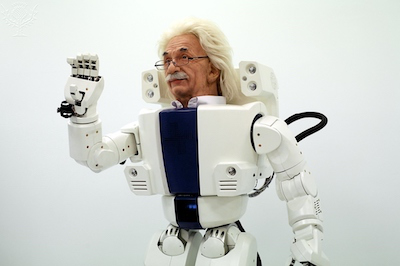

In [42]:
im = np.array(Image.open('../images/robot-enstein.jpg'))
Image.fromarray(im)

In [43]:
#Get the size and number of channels
h = im.shape[0]
w = im.shape[1]
c = im.shape[2]
print(w, h, c)

400 266 3


In [44]:
#Looking at pixels
#Gives us the RGB of a particular pixel -> We get three values for each one!
print(im[12,45])
#Pixel in the middle
print(im[mid_y,mid_x-60])

[237 243 239]
[219 219 207]


### Setting Pixel Values

As well as looking at pixel values, we can also set them to new things. We can do this by just changing the values in the arrays, just like we did with audio files. 

When we change the file, like we did with the audio, we first make a copy. This way the original image file stays unaltered so we can use it again  

```
new_image = im.copy()
```

#### Tuples

We can do this to single pixels, or groups of pixels. Each pixel is actually represented as a **tuple**. Tuples are single objects that hold mutiple values and are a **collection which is ordered and unchangeable**. This means we can access the items inside with indexes (because its ordered), but we cant change them (because they're unchangeable).

Tuples are written, and created, with **round brackets**

```
a = (1,2,3,4)
```

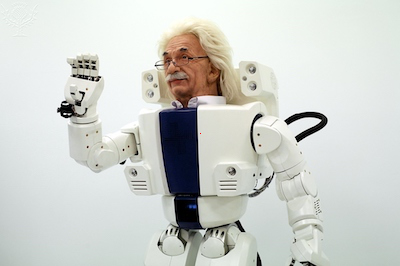

In [45]:
#Set the middle pixel to full red (RGB). Look reeeeal closely.
new_image = im.copy()
new_image[mid_y,mid_x] = (255,0,0)
Image.fromarray(new_image)

### Broadcasting 

We've seen in most cases that we do operations with arrays, they need to be the same size in all dimensions. For example

```
a = [1,2,3,5,6]
b = [4,5,6,7,8]
c = a + b
```

Adds the two arrays together **element-wise**. This means 

```
c[0] = a[0] + b[0]
c[1] = a[1] + b[1]
...
c[i] = a[i] + b[i]
```

This also works in more dimensions 

```
a = [[1,2,3],[4,5,6]]
b = [[4,5,6],[7,8,9]]
c = a + b
```

Adds the two arrays together **element-wise** again

```
c[0,0] = a[0,0] + b[0,0]
c[1,0] = a[1,0] + b[1,0]
...
c[i,j] = a[i,j] + b[i,j]
```

However, there are circumstances where we can have two things that are have different dimensions and NumPy will use **broadcasting** to work out what to do. We've seen this before with single values 

```
a = [1,2,3,4,5]
b = 2
c = a * b
```

We multiply every element in `a` by `b`

```
c[0] = a[0] * b
c[1] = a[1] * b
...
c[i] = a[i] * b
```

This can also work with more dimensions, for example this:

```
a = [[1,2,3],[4,5,6]]
b = [1,2,3]
c = a + b
```

Works because a set of arrays is said to be broadcastable if **one** of the following is true

 - Arrays have exactly the same shape.

 - Arrays have the same number of dimensions and the length of each dimension is either the same or 1.

 - Array having too few dimensions can have its shape prepended with a dimension of length 1, so that the above stated property is true. In this case, the smaller array is **broadcasted** to match the dimensions of the larger array

Because the shapes are `(2, 3)` and `(3)`, then you can prepend one dimension onto `b` (making `(1, 3)`) and the rules hold true. We would then do the arithmetic element-wise by row 

```
c[0,0] = a[0,0] + b[0]
c[1,0] = a[2,0] + b[1]
c[2,0] = a[3,0] + b[2]
c[1,0] = a[1,0] + b[0]
...
c[i,j] = a[i,j] + b[j]
```

However

```
a = [[1,2,3],[4,5,6]]
b = [1,2]
c = a + b
```

**Doesn't work** because the shapes are `(2, 3)` and `(2)`, and theres no way of prepending dimensions of 1 `b` so that the rules hold true. 

In [46]:
new_image[0:100,0:100].shape


(100, 100, 3)

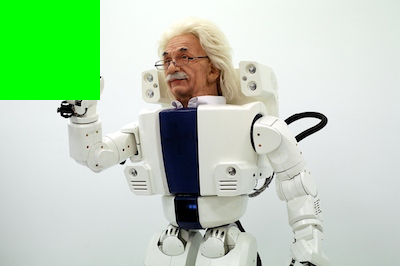

In [47]:
#Set 100 x 100 square in top left to green (RGB)
new_image = im.copy()
new_image[0:100,0:100] = (0,255,0)
Image.fromarray(new_image)

### Splitting Colours

We can also use **broadcasting** to split out individual colours by setting all other channels to 0. 

We use the `:` to select all rows and columns, then use a **array of indexes** to specify which channels we want to set to 0

(266, 400, 2)


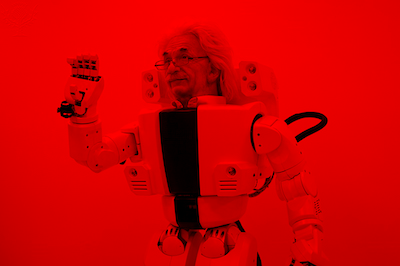

In [48]:
#Set all the pixels for (1,2) to zero (green and blue)
new_image = im.copy()
new_image[:, :, [1, 2]] = 0
print(new_image[:, :, [1, 2]].shape)
Image.fromarray(new_image)

In [49]:
new_image[:, :, [1, 2]]

array([[[0, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]],

       [[0, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]],

       [[0, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]],

       ...,

       [[0, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]],

       [[0, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]],

       [[0, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]]], dtype=uint8)

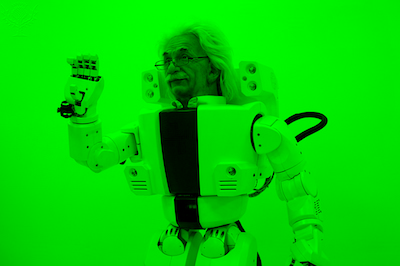

In [50]:
#Set all the pixels for (0,2) to zero (red and blue)
new_image = im.copy()
new_image[:, :, [0, 2]] = 0
Image.fromarray(new_image)

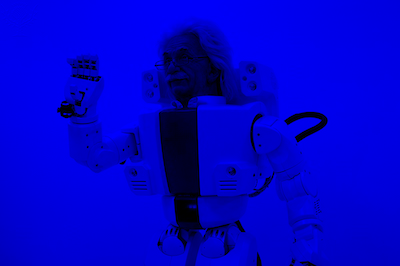

In [51]:
#Set all the pixels for (0,1) to zero (red and green)
new_image = im.copy()
new_image[:, :, [0, 1]] = 0
Image.fromarray(new_image)

### Trimming

We can cut sections out of our array to trim the image

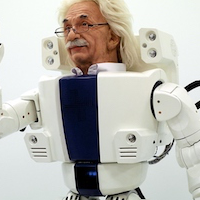

In [52]:
#Trim a square out of the centre
cut = 100
new_image = im[mid_y-cut:mid_y+cut,mid_x-cut:mid_x+cut]
Image.fromarray(new_image)

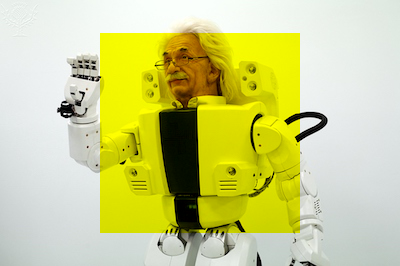

In [53]:
#Set the blue values of the centre square to 0, leaving yellow!
cut = 100
new_image = im.copy()
new_image[mid_y-cut:mid_y+cut,mid_x-cut:mid_x+cut,2] = 0
Image.fromarray(new_image)

### Copy paste

You can also cut out sections and place them back together in different places

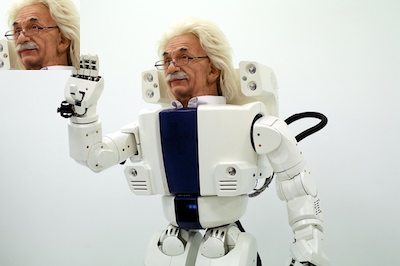

In [54]:
new_image = im.copy()
face = im[30:100,150:230]
fh = face.shape[0]
fw = face.shape[1]
#Use the size of the face when indexing to make sure its the right size
new_image[:fh,:fw] = face
Image.fromarray(new_image)

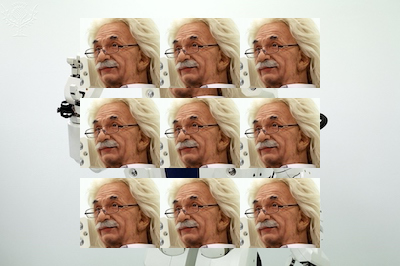

In [55]:
#Tile face
new_image = im.copy()
square = 80
for i in [-1,0,1]:
    for j in [-1,0,1]:
        y = int(mid_y + (square * i) - (fh/2))
        x = int(mid_x + (square * j) - (fw/2))
        new_image[y:y+fh, x:x+fw] = face
Image.fromarray(new_image)

### Blending

We can multiply the sections by fractions to create an transparency blending effect. Its important to remember here that we have to **fade both images**. Otherwise, when we add them together, some values might go over 255 (which is the max). In which case bad things happen. 

Also, what happens when you **subtract** instead of add?

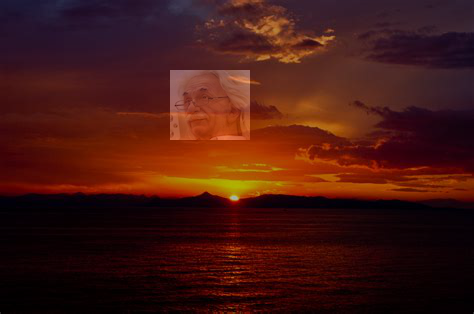

In [24]:
im2 = np.array(Image.open('../images/sunset.jpg'))
new_image = im2.copy()
#Fade the sunset 70%
new_image = new_image * 0.7
face = im[30:100,150:230].copy()
#Fade the sunset 30%
face = face * 0.3
fh = face.shape[0]
fw = face.shape[1]
y = 70
x = 170
new_image[y:y+fh,x:x+fw] = new_image[y:y+fh:,x:x+fw] + face
#Because we've done multiplying by decimals, we have to make sure the pixels are ints again
Image.fromarray(new_image.astype(np.uint8))

### Working with multiple images 

We can also average loads pictures together to find a mean value image! To do this we're going to use a Python function that will do a `recursive walk` into a file system. We can do this to get every image in a folder!

When all the images are the same size, this is easy

### The `os` Package

`os` is a Python package provides a way of using operating system dependent functionality.

The functions that the OS module provides allows you to interface with the underlying operating system that Python is running on – be that Windows, Mac or Linux.

We use two key functions in the code below

1. `os.walk`

    We provide a root folder, and this does a `walk` through it (and all its subfolders) and returns all of the files it finds. First `for loop` iterates over every folder, and the inner `for loop` iterates over all the files in that folder. 
    
    
2. `os.path.join`

    This makes us a file path by joining together two strings, and does so in the correct manner depending on what operating systems we are running on. If oyu want code that will run many places, this is the safest thing to use!

In [27]:
import os
faces = []
crop = 256
#Go through all the files in the faces folder
for root, dirs, files in os.walk("../images/faces", topdown=False):
    for name in files:
        if ".png" in name:
            f = os.path.join(root, name)
            im = np.array(Image.open(f))
            faces = faces + [im]
faces = np.array(faces)

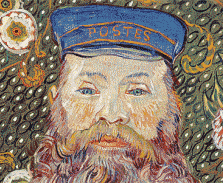

In [28]:
Image.fromarray(faces[45])

#### Averaging 

We now have a **4D array**, which is to say an array of images, each having 3D. 

To get the average of all the pictures, we average over the first dimension (images), to get back a **3D array** which is the average of all images.

(51, 183, 223, 4)
(183, 223, 4)


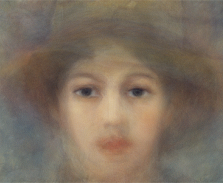

In [29]:
#Average face!
print(faces.shape)
mean_face = np.mean(faces,(0)).astype(np.uint8)
print(mean_face.shape)
Image.fromarray(mean_face)

### Dealing with different sized images 

The above works because all the images are the same size. However, when they are different sizes we gotta do some cropping

1. Do a first pass where we find the smallest width and height 
2. Do a second pass where load the image and centre-crop to the smallest size

In [31]:
#First find the smallest image
cats = []
#Start with infinity (anything will be smaller than this)
smallest = [np.Inf, np.Inf]
#Go through all the files in the cat folder
for root, dirs, files in os.walk("../images/cats", topdown=False):
    for name in files:
        if ".jpg" in name:
            f = os.path.join(root, name)
            im = np.array(Image.open(f))
            #Update min height
            if im.shape[0] < smallest[0]:
                smallest[0] = im.shape[0]
            #Update min width
            if im.shape[1] < smallest[1]:
                smallest[1] = im.shape[1]

#Then crop all to the same size             
crop_h = int(smallest[0]/2)
crop_w = int(smallest[1]/2)
#Go through all the files in the cat folder
for root, dirs, files in os.walk("../images/cats", topdown=False):
    for name in files:
        if not ".DS_Store" in name:
            f = os.path.join(root, name)
            im = np.array(Image.open(f))
            #Centre crop to same size
            mid_y = int(im.shape[0]/2)
            mid_x = int(im.shape[1]/2)
            im = im[mid_y-crop_h:mid_y+crop_h, mid_x-crop_w:mid_x+crop_w]
            cats = cats + [im]
cats = np.array(cats)

In [32]:
im1 = np.array(Image.open("images/cats/108_252738.jpg"))
im2 = np.array(Image.open("images/cats/108_255135.jpg"))

FileNotFoundError: [Errno 2] No such file or directory: 'images/cats/108_252738.jpg'

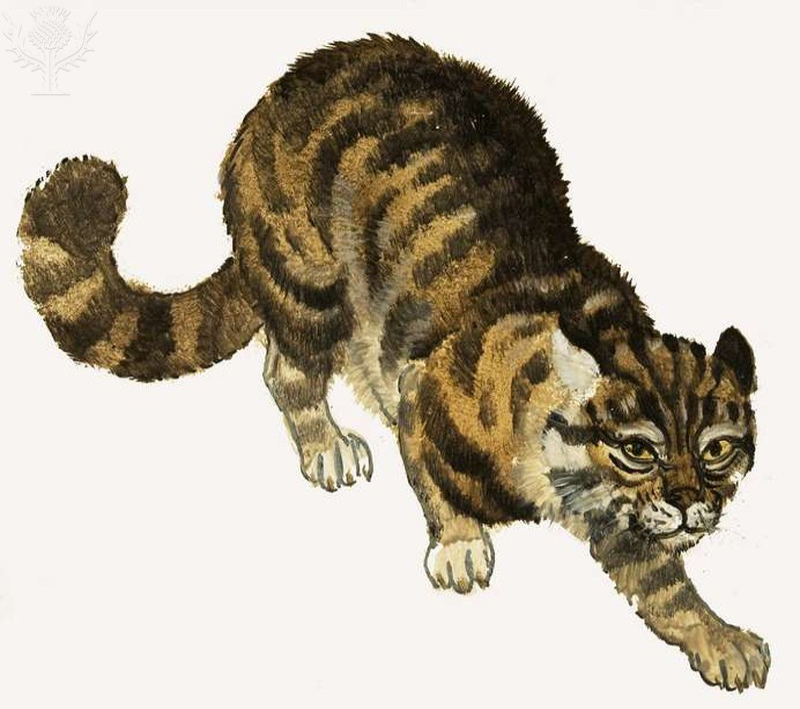

In [53]:
im2 = cv2.resize(im2, (im1.shape[0],im1.shape[1]))
Image.fromarray(im2)

### OpenCV

As we did with audio and `librosa` I'm going to introduce you to the most popular library for getting information from images, its called [OpenCV](https://opencv.org/). 

**CV** for **Computer Vision**. 

You can do a lot of things we've done above in **OpenCV**, as well as a bunch of more complicated things! 

Again, like audio, images in their raw form (just pixels) are not super useful using as is in data science tasks, so we often extract features first. 

We could teach a whole unit on computer vision! OpenCV has a bunch of [tutorials](https://docs.opencv.org/4.5.0/d6/d00/tutorial_py_root.html) you can check out if you want to go deeper into the theory. 

### Aligning faces 

As an example, and also as a refresher on some basic **trigonometry** we're going to look at how to **align faces** using OpenCV. This task is broadly based on [Data Hackers](http://datahacker.rs/opencv-for-hackers/) tutorials, which are great and a good place to start digging deeper. 

We'll learn how to 

- Find facial landmarks 
- Use openCV to mark images 
- Use some trigonometry to get the correction angle for the face 
- Rotate the image to align the face



In [ ]:
!pip install opencv-contrib-python
!pip install ipyplot

In [35]:
import cv2 as cv2
import ipyplot


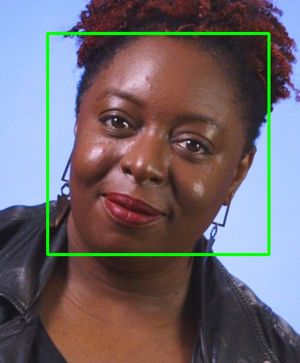


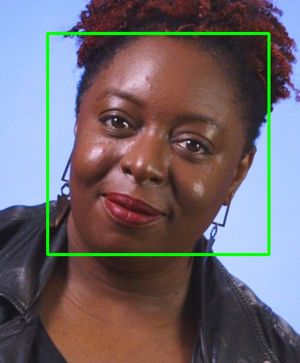

In [36]:
#First find the face
face_cascade=cv2.CascadeClassifier("../data/haarcascade_frontalface_default.xml")
eye_cascade=cv2.CascadeClassifier("../data/haarcascade_eye.xml")
#Here is a picture of Kimberly Bryant, founder of Black Girls Code
img = cv2.imread('../images/kb2.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Converting the image into grayscale
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Creating variable faces
faces= face_cascade.detectMultiScale(img, 1.1, 4)
# Defining and drawing the rectangle around the face
for x, y, w, h in faces:
    cv2.rectangle(img, (x,y) ,(x+w, y+h), (0,255,0), 3)
ipyplot.plot_images([img], img_width=300)

### Finding the angle between the eyes

Here we find the eyes and draw the line that connects them 

In [31]:
?eye_cascade.detectMultiScale


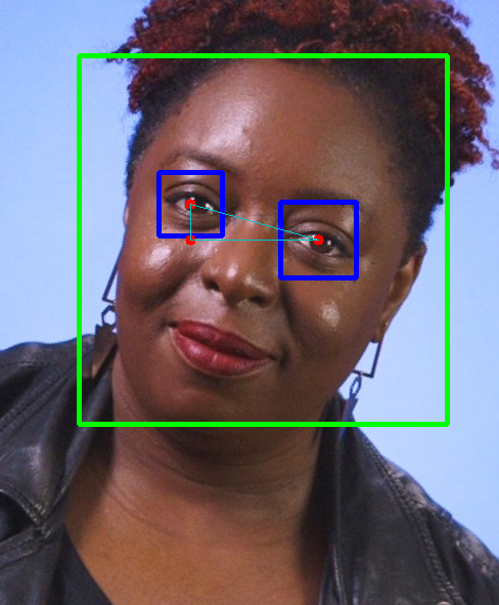


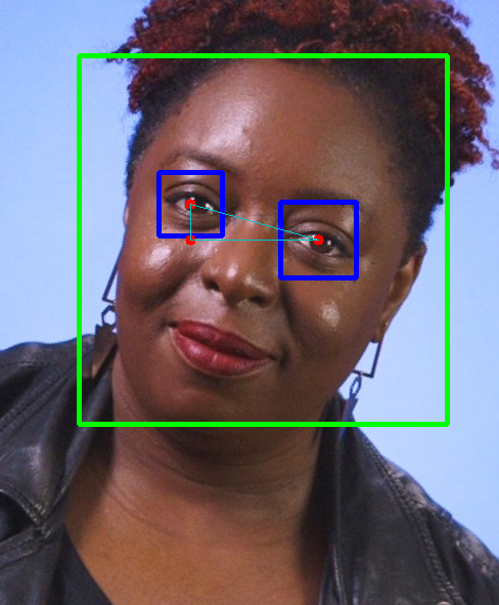

In [23]:
roi_gray=gray[y:(y+h), x:(x+w)]
roi_color=img[y:(y+h), x:(x+w)]
# Creating variable eyes
eyes = eye_cascade.detectMultiScale(roi_gray, 1.1, 4)
index=0
# Creating for loop in order to divide one eye from another
for (ex , ey,  ew,  eh) in eyes:
    if index == 0:
        #Save the eyes as TUPLES
        eye_1 = (ex, ey, ew, eh)
    elif index == 1:
        eye_2 = (ex, ey, ew, eh)
    # Drawing rectangles around the eyes
    cv2.rectangle(roi_color, (ex,ey) ,(ex+ew, ey+eh), (0,0,255), 3)
    index = index + 1

if eye_1[0] < eye_2[0]:
    left_eye = eye_1
    right_eye = eye_2
else:
    left_eye = eye_2
    right_eye = eye_1
# Calculating coordinates of a central points of the rectangles
left_eye_center = (int(left_eye[0] + (left_eye[2] / 2)), int(left_eye[1] + (left_eye[3] / 2)))
left_eye_x = left_eye_center[0] 
left_eye_y = left_eye_center[1]
 
right_eye_center = (int(right_eye[0] + (right_eye[2]/2)), int(right_eye[1] + (right_eye[3]/2)))
right_eye_x = right_eye_center[0]
right_eye_y = right_eye_center[1]
 
cv2.circle(roi_color, left_eye_center, 5, (255, 0, 0) , -1)
cv2.circle(roi_color, right_eye_center, 5, (255, 0, 0) , -1)
cv2.line(roi_color,right_eye_center, left_eye_center,(0,200,200),1)
if left_eye_y > right_eye_y:
    A = (right_eye_x, left_eye_y)
    # Integer -1 indicates that the image will rotate in the clockwise direction
    direction = -1 
else:
    A = (left_eye_x, right_eye_y)
    # Integer 1 indicates that image will rotate in the counter clockwise  
    # direction
    direction = 1 

cv2.circle(roi_color, A, 5, (255, 0, 0) , -1)
 
cv2.line(roi_color,right_eye_center, left_eye_center,(0,200,200),1)
cv2.line(roi_color,left_eye_center, A,(0,200,200),1)
cv2.line(roi_color,right_eye_center, A,(0,200,200),1)
ipyplot.plot_images([img], img_width=500)

### Trigonometry Refresher 

Here we have a right angled triangle, it has 3 angles and 3 sides. If we know some of these things, then we are able to work out some of the **unknowns**. 

We name the sides of the triangle in the relation to the **right angle**. This is the angle which is 90 degrees in te corner. The three respective sides are 

 - Adjacent 
 - Opposite 
 - Hypotenuse 

In [ ]:
trig = cv2.imread('images/sohcahtoa.jpg')
trig = cv2.cvtColor(trig, cv2.COLOR_BGR2RGB)
ipyplot.plot_images([trig], img_width=400)

### Calculating Theta 

What we want to know is the angle in the corner of the triangle (shown by the greek symbol **Theta θ**). This will allow us to rotate the image back so that the face is aligned parallel in the image. 

If we look at the triangle we have made between the eyes, we know that have the values for the **adjacent** and **opposite** sides. Using the above rules, we can see that 

```
tan(θ) = opp/adj
```


And by doing a bit of algebra, we do the opposite operation to tan to both sides to solve for θ. This is called **arctan**, and this exists for both sin (**arcsin**) and cos (**arccos**).

```
θ = arctan(opp/adj)
```

For all types of problems involving **right angled** triangles and you are looking to calculate **lengths** or **angles**, you can use the appropriate formula depending on what you know, and what you need to find out. 

For example, if you wanted to find out the length of the opposite side, and you knew the length of the hypotenuse (20) and the angle of theta (35):

```
sin(θ) = opp/hyp

sin(35) = opp/20

20 * sin(35) = opp

opp = 11.471
```


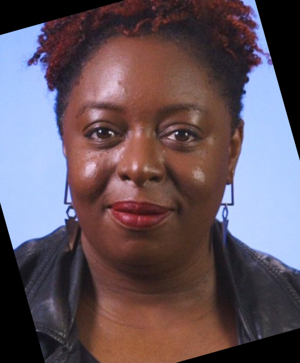


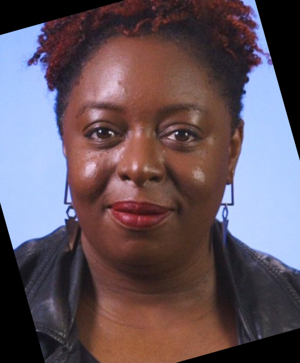

In [27]:
#Get the 
adjacent = right_eye_x - left_eye_x
opposite = right_eye_y - left_eye_y
angle = np.arctan(opposite/adjacent)
#Convert from radians into degrees
angle = (angle * 180) / np.pi
#angle = 15
img = cv2.imread('images/kb2.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Width and height of the image
h, w = img.shape[:2]
# Calculating a center point of the image
# Integer division "//"" ensures that we receive whole numbers
center = (w // 2, h // 2)
# Defining a matrix M and calling
# cv2.getRotationMatrix2D method
M = cv2.getRotationMatrix2D(center, (angle), 1.0)
# Applying the rotation to our image using the
# cv2.warpAffine method
rotated = cv2.warpAffine(img, M, (w, h))
ipyplot.plot_images([rotated], img_width=300)